## Python One Sample T Test 

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Example 1 (Manual Calculation)
null_hypothesis_mean = 7.5

In [3]:
confidence_level = 0.95

In [19]:
alpha = 1 - confidence_level
alpha

0.050000000000000044

In [5]:
sample_hat_sizes = [7.4, 7.6, 7.7, 7.3, 7.5, 7.8, 7.6]

In [6]:
# Step 2 (Sample Mean)

In [7]:
sample_mean = np.mean(sample_hat_sizes)
print(sample_mean)

7.557142857142857


In [8]:
# Step 3 Calculate Standard Deviation

In [9]:
sample_std = np.std(sample_hat_sizes, ddof=1)

In [10]:
print(sample_std)

0.17182493859684486


In [11]:
# Step 4 t-statistic

In [12]:
n = len(sample_hat_sizes)

In [15]:
t_statistic = (sample_mean - null_hypothesis_mean) / (sample_std/np.sqrt(n))
t_statistic

0.8798826901281169

In [16]:
# Step 5 Degrees of freedom and p value

In [17]:
degrees_of_freedom = n - 1

In [18]:
p_value = 2 * (1 - stats.t.cdf(t_statistic, df=degrees_of_freedom))
print(p_value)

0.41277302537781635


In [20]:
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


In [21]:
# Example 2 Shoes Two Tail

In [22]:
alpha = 0.05

In [23]:
sample_data = [380, 410, 395, 405, 390]

In [24]:
population_mean = 400

In [25]:
t_statistic, p_value_two_tailed = stats.ttest_1samp(sample_data, population_mean)

In [26]:
print(t_statistic)

-0.7492686492653552


In [27]:
print(p_value_two_tailed)

0.4953543088910324


In [29]:
if p_value_two_tailed < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis


In [31]:
# Example 3 Compare the rookie batting average to the leagues

# null hypothesis rookie batting average is the same as the leagues
# alt rookies batting average is less than the league average
# 99% Confidence level

In [32]:
alpha = 0.01

In [34]:
rookie_batting_averages = [0.210, 0.250, 0.147, 0.286, 0.214, 0.123, 0.145, 0.178, 0.120]

In [35]:
mean_rookie_avg = np.mean(rookie_batting_averages)

In [36]:
mean_rookie_avg

0.18588888888888888

In [37]:
league_avg = 0.25

In [38]:
t_statistic, p_value_two_tailed = stats.ttest_1samp(rookie_batting_averages, league_avg)

In [39]:
p_value_one_tailed = p_value_two_tailed / 2

In [41]:
t_statistic, p_value_one_tailed

(-3.3078125719237517, 0.005366567310049671)

In [43]:
if p_value_one_tailed < alpha:
    print("Reject the null hypothesis. The rookie's average is significantly lower from the league average")
else:
    print("Faile to reject the null hypothesis. There is no significant difference between the rookies' average and the league average")

Reject the null hypothesis. The rookie's average is significantly lower from the league average


In [44]:
# Example 4 boxplot

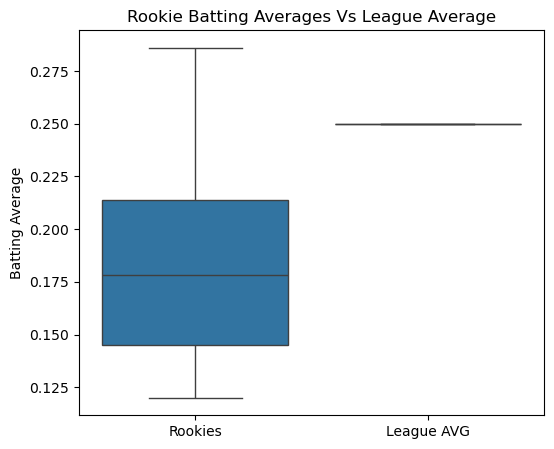

In [49]:
plt.figure(figsize=(6,5))
sns.boxplot(data=[rookie_batting_averages, np.full(len(rookie_batting_averages), league_avg)])
plt.xticks([0, 1], ['Rookies', 'League AVG'])
plt.title('Rookie Batting Averages Vs League Average')
plt.ylabel('Batting Average')
plt.show()

In [50]:
# Example 5 99% Confidence Interval

In [51]:
std_error = stats.sem(rookie_batting_averages)

In [65]:
confidence_interval = stats.t.interval(0.99, len(rookie_batting_averages) - 1, loc = mean_rookie_avg, scale=std_error)

In [66]:
stats.t.interval?

Signature: stats.t.interval(confidence, *args, **kwds)
Docstring:
Confidence interval with equal areas around the median.

Parameters
----------
confidence : array_like of float
    Probability that an rv will be drawn from the returned range.
    Each value should be in the range [0, 1].
arg1, arg2, ... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information).
loc : array_like, optional
    location parameter, Default is 0.
scale : array_like, optional
    scale parameter, Default is 1.

Returns
-------
a, b : ndarray of float
    end-points of range that contain ``100 * alpha %`` of the rv's
    possible values.

Notes
-----
This is implemented as ``ppf([p_tail, 1-p_tail])``, where
``ppf`` is the inverse cumulative distribution function and
``p_tail = (1-confidence)/2``. Suppose ``[c, d]`` is the support of a
discrete distribution; then ``ppf([0, 1]) == (c-1, d)``. Therefore,
when ``confidence=1`` and the distributio

In [67]:
confidence_interval

(0.12085569691005127, 0.2509220808677265)

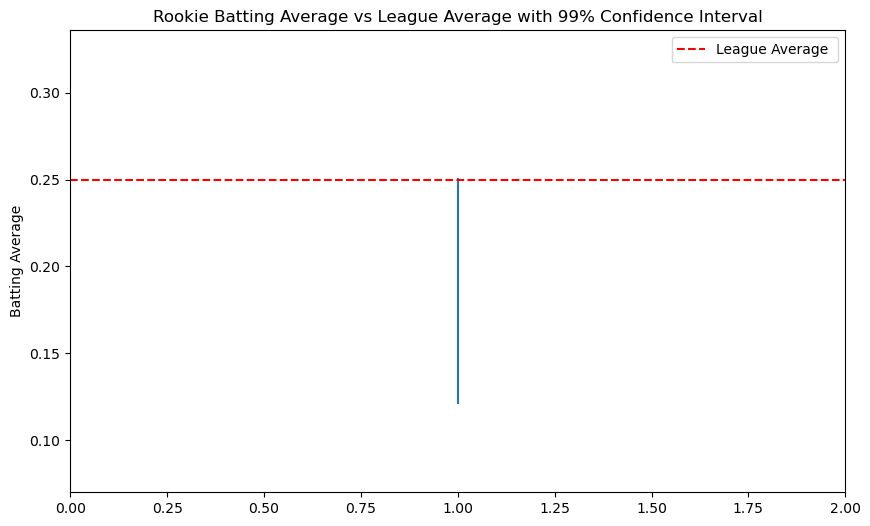

In [72]:
plt.figure(figsize=(10, 6))
plt.errorbar(1, mean_rookie_avg, yerr=(confidence_interval[1] - mean_rookie_avg))
plt.axhline(league_avg, color='red', linestyle='--', label='League Average ')
plt.xlim(0, 2)
plt.ylim(min(rookie_batting_averages) - 0.05, max(rookie_batting_averages) + 0.05)
# plt.xticks([])
plt.ylabel('Batting Average')
plt.title('Rookie Batting Average vs League Average with 99% Confidence Interval')
plt.legend()
plt.show()

In [69]:
plt.errorbar?

Signature:
plt.errorbar(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    yerr: 'float | ArrayLike | None' = None,
    xerr: 'float | ArrayLike | None' = None,
    fmt: 'str' = '',
    ecolor: 'ColorType | None' = None,
    elinewidth: 'float | None' = None,
    capsize: 'float | None' = None,
    barsabove: 'bool' = False,
    lolims: 'bool | ArrayLike' = False,
    uplims: 'bool | ArrayLike' = False,
    xlolims: 'bool | ArrayLike' = False,
    xuplims: 'bool | ArrayLike' = False,
    errorevery: 'int | tuple[int, int]' = 1,
    capthick: 'float | None' = None,
    *,
    data=None,
    **kwargs,
) -> 'ErrorbarContainer'
Docstring:
Plot y versus x as lines and/or markers with attached errorbars.

*x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
sizes. By default, this draws the data markers/lines as well as the
errorbars. Use fmt='none' to draw errorbars without any data markers.

.. versionadded:: 3.7
   Caps and error lines are drawn in polar coordi

In [70]:
mean_rookie_avg

0.18588888888888888

In [73]:
# Example 6